In [2]:
import numpy as np

In [3]:
def F(x):
    return np.cos(x) + x[::-1] - [1, 2, 3, 4]
import scipy.optimize
x = scipy.optimize.broyden1(F, [1,1,1,1], f_tol=1e-14)
x

np.cos(x) + x[::-1]

array([ 1.,  2.,  3.,  4.])

0:  |F(x)| = 626.642; step 1; tol 0.000157679
1:  |F(x)| = 234.795; step 1; tol 0.126352
2:  |F(x)| = 114.961; step 1; tol 0.215758
3:  |F(x)| = 24.1252; step 1; tol 0.0396353
4:  |F(x)| = 1.53236; step 1; tol 0.00363097
5:  |F(x)| = 0.118368; step 1; tol 0.00537016
6:  |F(x)| = 0.00888121; step 1; tol 0.00506662
7:  |F(x)| = 0.000125042; step 1; tol 0.000178408
Residual: 5.79949e-06


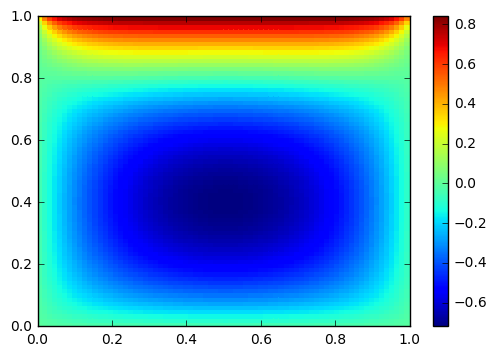

In [1]:
import numpy as np
from scipy.optimize import newton_krylov
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
    d2x = zeros_like(P)
    d2y = zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y - 10*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)
print('Residual: %g' % abs(residual(sol)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol)
plt.colorbar()
plt.show()